# Project 2: Diabetes Prediction Using Machine Learning

<img src="https://raw.githubusercontent.com/orlandojrps/Project2/0d776e0d45a63edad0aef41e771e72d5ac783ce4/images/img16.png" width="400" height="100"/>

Our objective is to predict whether the patient has diabetes or not on the basis of the features we will provide to our machine learning model. Dataset used: Pima Indians Diabetes Database.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import *
from sklearn.preprocessing import *
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.impute import *
from sklearn.base import *
from sklearn.compose import *
from plotnine import *
import pickle
from yellowbrick.model_selection import FeatureImportances

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/orlandojrps/Project2/main/Dataset/dataset2.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


## Check balance of the Database
<img src="https://github.com/orlandojrps/Project1/blob/main/images/img2.png?raw=true" width="500" height="100"/>


In [6]:
total = df.groupby('Outcome').agg(n = ('Outcome','count')).reset_index()
total['perc'] = 100*total['n']/total['n'].sum()

In [7]:
total

,Outcome,n,perc
0,0,500,65.104167
1,1,268,34.895833


## Check Outliers
<img src="https://github.com/orlandojrps/Project1/blob/main/images/img3.png?raw=true" width="300" height="100"/>

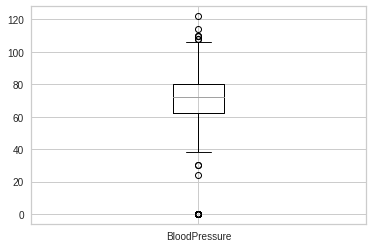

In [8]:
df[['BloodPressure']].boxplot()

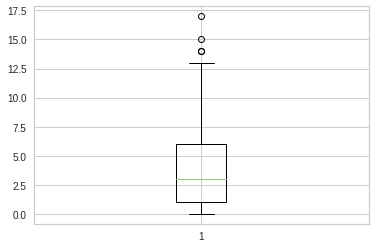

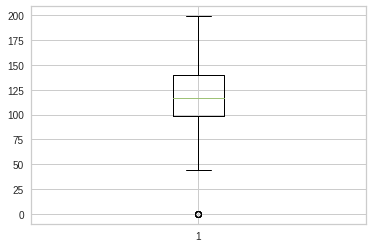

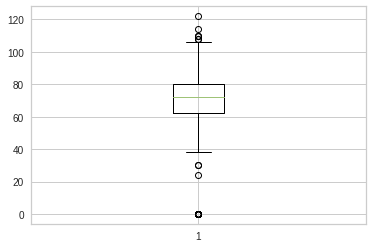

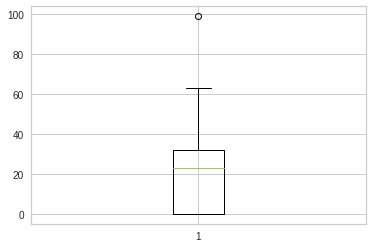

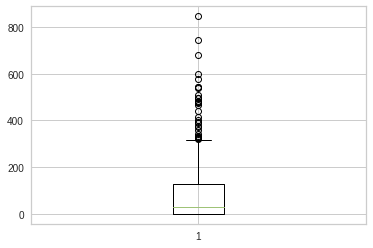

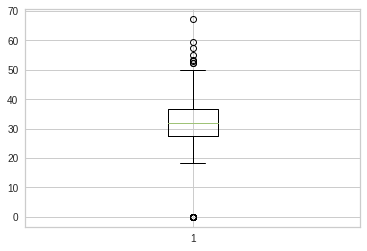

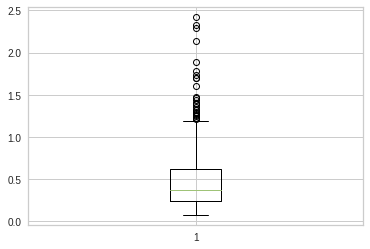

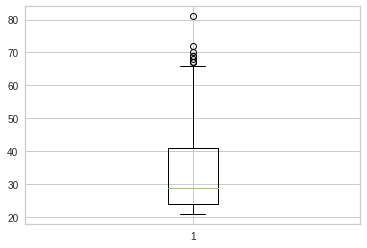

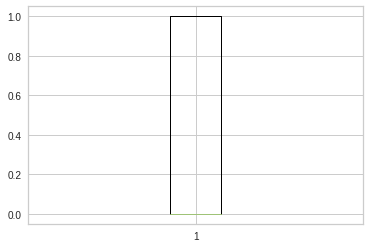

In [9]:
for col in df.columns:
    plt.figure()   # plots figure for each iteration
    plt.boxplot(df[f"{col}"])  

## Split Target and Features

<img src="https://github.com/orlandojrps/Project1/blob/main/images/img12.png?raw=true" width="300" height="100"/>

In [10]:
X = df.drop(columns = ['Outcome'])
y = df['Outcome']

## Split Train and Test. Target and Features
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Replace the 0 values

<img src="https://raw.githubusercontent.com/orlandojrps/Project1/main/images/img6.png" width="400" height="150"/>

In [12]:
df.isna().sum().to_frame()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Scaling the Data

<img src="https://raw.githubusercontent.com/orlandojrps/Project1/main/images/img5.png" width="350" height="100"/>

In [13]:
numeric_transformer = make_pipeline(SimpleImputer(strategy='median', missing_values=np.nan),
                                    MinMaxScaler())

## Process categorical variables 

<img src="https://raw.githubusercontent.com/orlandojrps/Project1/main/images/img7.png" width="600" height="100"/>

In [14]:
preprocessor = make_column_transformer(
        (numeric_transformer, ['Pregnancies',
                               'Glucose',
                               'BloodPressure',
                               'SkinThickness',
                               'Insulin',
                               'BMI',
                               'DiabetesPedigreeFunction',
                               'Age']))

In [15]:
pd.DataFrame(preprocessor.fit_transform(X))

,0,1,2,3,4,5,6,7
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


## Train the model with the most common Supervised Algorithms

<img src="https://github.com/orlandojrps/Project1/blob/main/images/img8.png?raw=true" width="250" height="80"/>

In [16]:
LR = make_pipeline(preprocessor,LogisticRegression(solver='lbfgs', max_iter=1000)).fit(X_train, y_train)
LDA = make_pipeline(preprocessor,LinearDiscriminantAnalysis()).fit(X_train, y_train)
CART = make_pipeline(preprocessor,DecisionTreeClassifier()).fit(X_train, y_train)
KNN = make_pipeline(preprocessor,KNeighborsClassifier()).fit(X_train, y_train)
SVM = make_pipeline(preprocessor,SVC(probability=True)).fit(X_train,y_train) 
RF = make_pipeline(preprocessor,RandomForestClassifier()).fit(X_train,y_train) 

## Choosing Metric

In [17]:
print("Training accuracy LR:", LR.score(X_train,y_train), "\n")
print("Training accuracy LDA:", LDA.score(X_train,y_train), "\n")
print("Training accuracy CART:", CART.score(X_train,y_train), "\n")
print("Training accuracy KNN:", KNN.score(X_train,y_train), "\n")
print("Training accuracy SVM:", SVM.score(X_train,y_train), "\n")
print("Training accuracy RF:", RF.score(X_train,y_train), "\n")

Training accuracy LR: 0.7665369649805448 

Training accuracy LDA: 0.7782101167315175 

Training accuracy CART: 1.0 

Training accuracy KNN: 0.8365758754863813 

Training accuracy SVM: 0.7976653696498055 

Training accuracy RF: 1.0 



## Confusion Matrix + Metrics

<img src="https://github.com/orlandojrps/Project1/blob/main/images/img14.png?raw=true" width="350" height="100"/>

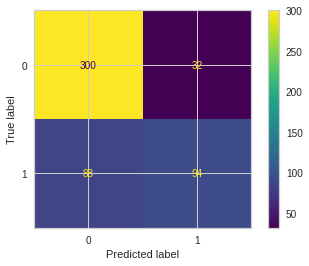

In [18]:
ConfusionMatrixDisplay.from_estimator(LR, X_train,y_train)
plt.show()

## Accuracy, Precision and Recall

---



In [19]:
metricas = {'Accuracy':  [LR.score(X_train,y_train),
                          LDA.score(X_train,y_train),
                          CART.score(X_train,y_train),
                          KNN.score(X_train,y_train),
                          SVM.score(X_train,y_train),
                          RF.score(X_train,y_train)],
            'Precision': [precision_score(y_train, LR.predict(X_train), pos_label = 0),
                          precision_score(y_train, LDA.predict(X_train), pos_label = 0),
                          precision_score(y_train, CART.predict(X_train), pos_label = 0),
                          precision_score(y_train, KNN.predict(X_train), pos_label = 0),
                          precision_score(y_train, SVM.predict(X_train), pos_label = 0),
                          precision_score(y_train, RF.predict(X_train), pos_label = 0)],
            'Recall' :   [recall_score(y_train, RF.predict(X_train), pos_label = 0),
                          recall_score(y_train, LDA.predict(X_train), pos_label = 0),
                          recall_score(y_train, CART.predict(X_train), pos_label = 0),
                          recall_score(y_train, KNN.predict(X_train), pos_label = 0),
                          recall_score(y_train, SVM.predict(X_train), pos_label = 0),
                          recall_score(y_train, RF.predict(X_train), pos_label = 0)]
        }

dados = pd.DataFrame(metricas, columns = ['Accuracy', 'Precision','Recall'], index=['LR','LDA','CART','KNN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.766537,0.773196,1.000000
LDA,0.778210,0.793011,0.888554
CART,1.000000,1.000000,1.000000
KNN,0.836576,0.840659,0.921687
SVM,0.797665,0.808108,0.900602
RF,1.000000,1.000000,1.000000


## ROC Curve
<img src="https://github.com/orlandojrps/Project1/blob/main/images/img15.png?raw=true" width="350" height="200"/>

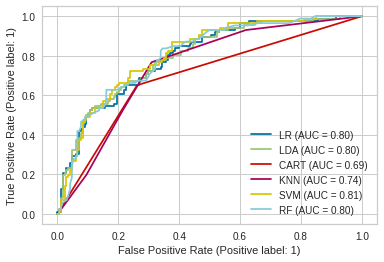

In [20]:
RocCurveDisplay.from_estimator(LR, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'LR')
RocCurveDisplay.from_estimator(LDA, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'LDA')
RocCurveDisplay.from_estimator(CART, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'CART')
RocCurveDisplay.from_estimator(KNN, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'KNN')
RocCurveDisplay.from_estimator(SVM, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'SVM')
RocCurveDisplay.from_estimator(RF, X_test, y_test,drop_intermediate=False,ax=plt.gca(), name = 'RF')

plt.show()

## Save & Load Model using Pickle

<img src="https://github.com/orlandojrps/Project1/blob/main/images/img9.png?raw=true" width="200" height="80"/>

In [21]:
pickle.dump(LR, open('Modelo_Diabete.sav', 'wb'))

## Load Model using Pickle

<img src="https://github.com/orlandojrps/Project1/blob/main/images/img10.png?raw=true" width="300" height="100"/>


In [22]:
loaded_model = pickle.load(open('Modelo_Diabete.sav', 'rb'))

## Testing with X_test and y_test, Check for overfitting

<img src="https://github.com/orlandojrps/Project1/blob/main/images/img11.png?raw=true" width="150" height="80"/>

In [23]:
print("Accuracy test LR:", loaded_model.score(X_test, y_test))
print("Precision teste LR:", precision_score(y_test, loaded_model.predict(X_test)))
print("Recall teste LR:", recall_score(y_test, loaded_model.predict(X_test)))

Accuracy test LR: 0.7440944881889764
Precision teste LR: 0.647887323943662
Recall teste LR: 0.5348837209302325
